In [26]:
import pandas as pd

In [27]:
df=pd.read_csv('BPCL (1).csv')

In [28]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,NaN,NaN,NaN
1,2000-01-04,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,NaN,NaN,NaN
2,2000-01-05,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,NaN,NaN,NaN
3,2000-01-06,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,NaN,NaN,NaN
4,2000-01-07,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,NaN,NaN,NaN


In [29]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,BPCL,EQ,423.05,426.0,428.35,417.55,417.60,418.90,421.33,6444098,2.715060e+14,68579.0,2408600.0,0.3738
5302,2021-04-27,BPCL,EQ,418.90,417.5,423.10,416.55,420.00,420.35,420.45,5408165,2.273853e+14,45282.0,2300523.0,0.4254
5303,2021-04-28,BPCL,EQ,420.35,422.0,424.35,414.90,417.15,417.50,419.33,9902533,4.152459e+14,59529.0,5176820.0,0.5228
5304,2021-04-29,BPCL,EQ,417.50,422.0,423.00,417.00,419.00,419.55,420.00,6632804,2.785775e+14,64676.0,2976829.0,0.4488
5305,2021-04-30,BPCL,EQ,419.55,417.5,437.50,414.65,422.10,421.80,428.14,16851470,7.214724e+14,195429.0,6453804.0,0.3830


In [30]:
df2=df.reset_index()['Turnover']

In [31]:
df2.shape

(5306,)

In [32]:
df2

0       3.482029e+11
1       8.573699e+11
2       5.490785e+12
3       2.263623e+12
4       1.633890e+12
            ...     
5301    2.715060e+14
5302    2.273853e+14
5303    4.152459e+14
5304    2.785775e+14
5305    7.214724e+14
Name: Turnover, Length: 5306, dtype: float64

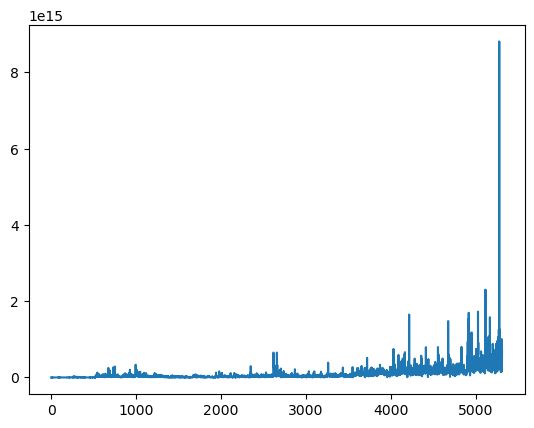

In [33]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [34]:
df2[1000:]

1000    5.783369e+13
1001    4.257380e+13
1002    3.381515e+13
1003    5.133228e+13
1004    7.176888e+13
            ...     
5301    2.715060e+14
5302    2.273853e+14
5303    4.152459e+14
5304    2.785775e+14
5305    7.214724e+14
Name: Turnover, Length: 4306, dtype: float64

In [35]:
import numpy as np

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [37]:
df2.shape

(5306, 1)

In [38]:
print(df2)

[[3.18552206e-05]
 [8.96495289e-05]
 [6.15577241e-04]
 ...
 [4.71258799e-02]
 [3.16129846e-02]
 [8.18849089e-02]]


In [39]:
training_dset_size=int(len(df2)*0.65)
test_dset_size=len(df2)-training_dset_size
train_data=df2[0:training_dset_size,:]
test_data=df2[training_dset_size:len(df2),:1]

In [40]:
import numpy
def create_dset(dataset,time_step=1):
    data_X=[]
    data_Y=[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        data_X.append(a)
        data_Y.append(dataset[i+time_step,0])
    return numpy.array(data_X),numpy.array(data_Y)

In [41]:
time_step=100
X_train_data, Y_train_data=create_dset(train_data,time_step)
X_test_data, Y_test_data=create_dset(test_data,time_step)

In [42]:
print(X_train_data)

[[3.18552206e-05 8.96495289e-05 6.15577241e-04 ... 3.50688682e-04
  3.82972523e-04 2.01820703e-04]
 [8.96495289e-05 6.15577241e-04 2.49269855e-04 ... 3.82972523e-04
  2.01820703e-04 6.82861363e-04]
 [6.15577241e-04 2.49269855e-04 1.77790415e-04 ... 2.01820703e-04
  6.82861363e-04 2.08566123e-04]
 ...
 [1.30817260e-02 5.01104693e-03 6.07198925e-03 ... 2.23383010e-03
  2.65833554e-03 3.12677992e-03]
 [5.01104693e-03 6.07198925e-03 3.97094974e-03 ... 2.65833554e-03
  3.12677992e-03 4.17666710e-03]
 [6.07198925e-03 3.97094974e-03 3.28941928e-03 ... 3.12677992e-03
  4.17666710e-03 7.21463977e-03]]


In [43]:
X_train_data=X_train_data.reshape(X_train_data.shape[0],X_train_data.shape[1],1)
X_test_data=X_test_data.reshape(X_test_data.shape[0],X_test_data.shape[1],1)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.fit(X_train_data,Y_train_data,validation_data=(X_test_data,Y_test_data),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
53/53 [==============================] - 47s 604ms/step - loss: 2.9515e-05 - val_loss: 0.0015
Epoch 2/100
53/53 [==============================] - 31s 586ms/step - loss: 1.7386e-05 - val_loss: 0.0013
Epoch 3/100
53/53 [==============================] - 30s 576ms/step - loss: 1.5814e-05 - val_loss: 0.0011
Epoch 4/100
53/53 [==============================] - 28s 526ms/step - loss: 1.4357e-05 - val_loss: 9.4527e-04
Epoch 5/100
53/53 [==============================] - 24s 453ms/step - loss: 1.4339e-05 - val_loss: 9.9091e-04
Epoch 6/100
53/53 [==============================] - 22s 423ms/step - loss: 1.4797e-05 - val_loss: 0.0010
Epoch 7/100
53/53 [==============================] - 22s 420ms/step - loss: 1.3608e-05 - val_loss: 9.2970e-04
Epoch 8/100
53/53 [==============================] - 22s 413ms/step - loss: 1.3866e-05 - val_loss: 0.0010
Epoch 9/100
53/53 [==============================] - 22s 415ms/step - loss: 1.3779e-05 - val_loss: 9.6031e-04
Epoch 10/100
53/53 [==========

In [48]:
import tensorflow as tf

In [49]:
train_predict_data=model.predict(X_train_data)
test_predict_data=model.predict(X_test_data)

55/55 [==============================] - 4s 67ms/step


In [50]:
train_predict_data=scaler.inverse_transform(train_predict_data)
test_predict_data=scaler.inverse_transform(test_predict_data)

In [51]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train_data,train_predict_data))

39392176093213.22

<function matplotlib.pyplot.show(close=None, block=None)>

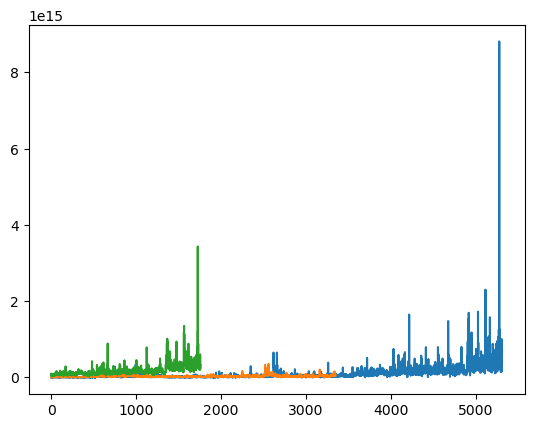

In [52]:
look_back=100
train_predicted_plots=numpy.empty_like(df2)
train_predicted_plots[:, :]=np.nan
train_predicted_plots[look_back:len(train_predict_data)+look_back,:]=train_predict_data
test_predicted_plots=numpy.empty_like(df2)
test_predicted_plots[:, :]=numpy.nan
test_predicted_plots[len(train_predict_data)+(look_back*2)+1:len(df2)-1,:]=test_predict_data
plt.plot(scaler.inverse_transform(df2))
plt.plot(train_predict_data)
plt.plot(test_predict_data)
plt.show

In [53]:
len(test_data)

1858

In [77]:
len(train_data)
input_x=test_data[1758:].reshape(1,-1)
input_x.shape

(1, 100)

In [82]:
input_x=test_data[1758:].reshape(1,-1)
input_x.shape

(1, 100)

In [83]:
new_input=list(input_x)
new_input=new_input[0].tolist()

In [84]:
new_input

[0.08298108509349353,
 0.03305356144859189,
 0.04556489858368694,
 0.02554753051319,
 0.037728918162445814,
 0.033084756145394786,
 0.06658646053153168,
 0.05100458701091417,
 0.039976042427157236,
 0.032341235746184,
 0.027645171813685646,
 0.029376398112392496,
 0.05454430166610776,
 0.04196499906633732,
 0.025384335302720936,
 0.02605766059509541,
 0.0212457409814941,
 0.017385937054246806,
 0.013376826042756362,
 0.018583690197880837,
 0.012416207378115749,
 0.03657866380156233,
 0.020133248797044208,
 0.03567513792189445,
 0.02917990475726561,
 0.05643936142889156,
 0.03106240580407785,
 0.03823916073488886,
 0.09990214803103388,
 0.060139697609259885,
 0.04196744898525247,
 0.03889570734972608,
 0.026032307218381276,
 0.023154166699380467,
 0.04139685817921448,
 0.035235968290313946,
 0.026710456234952974,
 0.026329253982297983,
 0.035683788973637824,
 0.03648967748662359,
 0.061675112178256025,
 0.040687723594448555,
 0.039780977162924384,
 0.036090219895650054,
 0.0182594516454

In [85]:
from numpy import array
first_output=[]
i=0
n_steps=100
while(i<30):
    if(len(new_input)>100):
        input_x=np.array(new_input[1:])
        print("{}day input{}".format(i,input_x))
        input_x=input_x.reshape(1,-1)
        input_x=input_x.reshape(1,n_steps,1)
        yhat=model.predict(input_x,verbose=0)
        print("{} day output {}".format(i,yhat))
        new_input.extend(yhat[0].tolist())
        new_input=new_input[1:]
        first_output.extend(yhat.tolist())
        i=i+1
    else:
        input_x=input_x.reshape(1,n_steps,1)
        yhat=model.predict(input_x,verbose=0)
        print(yhat[0])
        new_input.extend(yhat[0].tolist())
        print(len(new_input))
        first_output.extend(yhat.tolist())
        i=i+1
print(first_output)

[0.05563405]
101
1day input[0.03305356 0.0455649  0.02554753 0.03772892 0.03308476 0.06658646
 0.05100459 0.03997604 0.03234124 0.02764517 0.0293764  0.0545443
 0.041965   0.02538434 0.02605766 0.02124574 0.01738594 0.01337683
 0.01858369 0.01241621 0.03657866 0.02013325 0.03567514 0.0291799
 0.05643936 0.03106241 0.03823916 0.09990215 0.0601397  0.04196745
 0.03889571 0.02603231 0.02315417 0.04139686 0.03523597 0.02671046
 0.02632925 0.03568379 0.03648968 0.06167511 0.04068772 0.03978098
 0.03609022 0.01825945 0.03014677 0.10936596 0.04524572 0.02721974
 0.02608008 0.02637028 0.02562367 0.03975065 0.09992958 0.12044091
 0.04718761 0.07137073 0.02998966 0.09767853 0.09504414 0.03159741
 0.14279374 0.0469349  0.03322526 0.04719924 0.03015566 1.
 0.05953771 0.13703571 0.08775817 0.07974483 0.1432121  0.0646208
 0.06486928 0.06807769 0.04243843 0.02530721 0.04981643 0.04651727
 0.04162275 0.0243428  0.02250003 0.02789725 0.02240338 0.01810031
 0.01647738 0.01984965 0.02869443 0.01870338 0

In [86]:
new_data_daywise=np.arange(1,101)
day=np.arange(101,131)

In [87]:
import matplotlib.pyplot as plt

In [88]:
len(df2)

5306

In [89]:
df4=df2.tolist()
df4.extend(first_output)

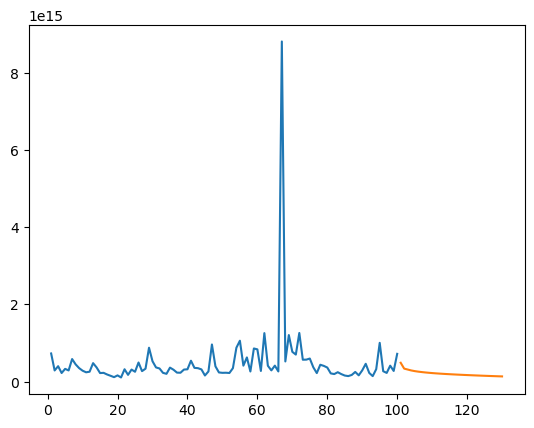

In [90]:
plt.plot(new_data_daywise,scaler.inverse_transform(df2[5206:]))
plt.plot(day,scaler.inverse_transform(first_output))